<a href="https://www.kaggle.com/code/rahulchauhan016/cardiopredict-ai-97-roc?scriptVersionId=297496481" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🫀 Advanced Heart Disease Prediction - ML & Deep Learning System


---

## 🎯 Advanced Features in This Notebook:

### 🤖 Machine Learning Models (15+)
✅ Traditional ML (RF, XGBoost, LightGBM, CatBoost)  
✅ Ensemble Methods (Stacking, Voting, Blending)  
✅ Advanced Boosting (AdaBoost, ExtraTrees)  

### 🧠 Deep Learning Models (8+)
✅ Deep Neural Networks (DNN)  
✅ Wide & Deep Networks  
✅ ResNet-style Architecture  
✅ Attention Mechanisms  
✅ Batch Normalization & Dropout  
✅ Learning Rate Scheduling  
✅ Early Stopping & Model Checkpointing  

### 📊 Advanced Techniques
✅ Bayesian Optimization for hyperparameters  
✅ Feature selection with multiple methods  
✅ SHAP explainability for DL  
✅ Calibration curves  
✅ Advanced visualizations  

---

## 1️⃣ Advanced Environment Setup

In [1]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
import itertools
from datetime import datetime
import json

# Sklearn - Preprocessing
from sklearn.model_selection import (
    train_test_split, cross_val_score, StratifiedKFold, 
    learning_curve, RandomizedSearchCV, GridSearchCV
)
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE

# Sklearn - Traditional ML Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    AdaBoostClassifier, ExtraTreesClassifier, 
    StackingClassifier, VotingClassifier, BaggingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Advanced ML Models
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Deep Learning - TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, regularizers
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Input, 
    Concatenate, Add, Multiply, LayerNormalization,
    Activation, LeakyReLU, PReLU
)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Nadam
from tensorflow.keras.callbacks import (
    EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, 
    TensorBoard, LearningRateScheduler
)
from tensorflow.keras.utils import plot_model

# Sklearn - Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, 
    classification_report, precision_recall_curve, 
    average_precision_score, matthews_corrcoef, cohen_kappa_score,
    log_loss, brier_score_loss
)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

# Imbalanced Learning
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# Model Explainability
import shap

# Serialization
import joblib
import pickle

# Plotting Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# TensorFlow Configuration
tf.random.set_seed(42)
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

# Custom color palette (professional)
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'success': '#06A77D',
    'danger': '#D62839',
    'warning': '#F77F00',
    'info': '#4ECDC4',
    'dark': '#2D3142',
    'light': '#BFC0C0',
    'purple': '#6A4C93',
    'teal': '#1D7874'
}

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Advanced environment setup complete!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

2026-02-13 10:23:09.222909: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770978189.389142      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770978189.439596      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770978189.852635      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770978189.852672      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770978189.852675      55 computation_placer.cc:177] computation placer alr

TensorFlow Version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
✅ Advanced environment setup complete!
📅 Analysis Date: 2026-02-13 10:23:23


## 2️⃣ Data Loading & Advanced Preprocessing

In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/heartdisease/Heart_Disease_Prediction.csv")

print("📊 Dataset Shape:", df.shape)
print("\n" + "="*100)
print("🔍 First Few Rows:")
display(df.head())

# Data quality check
print("\n" + "="*100)
print("🔎 Data Quality Assessment")
print("="*100)

missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    print("⚠️  Missing Values:")
    print(missing_data[missing_data > 0])
else:
    print("✅ No missing values!")

print(f"\n🔄 Duplicates: {df.duplicated().sum()}")
print("\n🎯 Target Distribution:")
print(df['Heart Disease'].value_counts())

# Clean data
df = df.dropna().drop_duplicates()

# Encode target
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])

print("\n✅ Preprocessing complete!")

📊 Dataset Shape: (270, 14)

🔍 First Few Rows:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence



🔎 Data Quality Assessment
✅ No missing values!

🔄 Duplicates: 0

🎯 Target Distribution:
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

✅ Preprocessing complete!


## 3️⃣ Advanced Feature Engineering

In [4]:
import numpy as np
import pandas as pd

# Advanced Feature Engineering
df_engineered = df.copy()

print("🔧 Creating Advanced Features...\n")

# -------------------------------
# 1. Age-based features
# -------------------------------
df_engineered['Age_Group'] = pd.cut(
    df_engineered['Age'],
    bins=[-np.inf, 40, 50, 60, np.inf],
    labels=[0, 1, 2, 3],
    include_lowest=True
).astype(int)

df_engineered['Age_Squared'] = df_engineered['Age'] ** 2
df_engineered['Age_Log'] = np.log1p(df_engineered['Age'])

# -------------------------------
# 2. Cardiovascular risk score
# -------------------------------
df_engineered['CV_Risk_Score'] = (
    df_engineered['Age'] * 0.2 +
    df_engineered['BP'] * 0.3 +
    df_engineered['Cholesterol'] * 0.25 +
    (df_engineered['Max HR'].max() - df_engineered['Max HR']) * 0.25
)

# -------------------------------
# 3. BP features
# -------------------------------
df_engineered['BP_Category'] = pd.cut(
    df_engineered['BP'],
    bins=[-np.inf, 120, 130, 140, np.inf],
    labels=[0, 1, 2, 3],
    include_lowest=True
).astype(int)

df_engineered['BP_Squared'] = df_engineered['BP'] ** 2

df_engineered['BP_Normalized'] = (
    (df_engineered['BP'] - df_engineered['BP'].mean()) /
    df_engineered['BP'].std()
)

# -------------------------------
# 4. Cholesterol features
# -------------------------------
df_engineered['Chol_Category'] = pd.cut(
    df_engineered['Cholesterol'],
    bins=[-np.inf, 200, 240, np.inf],
    labels=[0, 1, 2],
    include_lowest=True
).astype(int)

df_engineered['Chol_Squared'] = df_engineered['Cholesterol'] ** 2
df_engineered['Chol_Log'] = np.log1p(df_engineered['Cholesterol'])

# -------------------------------
# 5. Heart rate features
# -------------------------------
df_engineered['Max_HR_Squared'] = df_engineered['Max HR'] ** 2

df_engineered['HR_BP_Ratio'] = (
    df_engineered['Max HR'] / (df_engineered['BP'] + 1)
)

df_engineered['HR_Age_Ratio'] = (
    df_engineered['Max HR'] / (df_engineered['Age'] + 1)
)

# -------------------------------
# 6. Interaction features
# -------------------------------
df_engineered['Age_BP_Interaction'] = (
    df_engineered['Age'] * df_engineered['BP']
)

df_engineered['Age_Chol_Interaction'] = (
    df_engineered['Age'] * df_engineered['Cholesterol']
)

df_engineered['BP_Chol_Interaction'] = (
    df_engineered['BP'] * df_engineered['Cholesterol']
)

df_engineered['ST_HR_Ratio'] = (
    df_engineered['ST depression'] /
    (df_engineered['Max HR'] + 1)
)

df_engineered['ST_Age_Product'] = (
    df_engineered['ST depression'] *
    df_engineered['Age']
)

# -------------------------------
# 7. Binary high-risk indicators
# -------------------------------
df_engineered['High_BP'] = (
    df_engineered['BP'] > 140
).astype(int)

df_engineered['High_Cholesterol'] = (
    df_engineered['Cholesterol'] > 240
).astype(int)

df_engineered['Low_Max_HR'] = (
    df_engineered['Max HR'] < 120
).astype(int)

df_engineered['High_ST_Depression'] = (
    df_engineered['ST depression'] > 1.5
).astype(int)

df_engineered['Elderly'] = (
    df_engineered['Age'] > 65
).astype(int)

# -------------------------------
# 8. Combined risk factors
# -------------------------------
df_engineered['Risk_Factor_Count'] = (
    df_engineered['High_BP'] +
    df_engineered['High_Cholesterol'] +
    df_engineered['Exercise angina'] +
    df_engineered['FBS over 120'] +
    df_engineered['Elderly']
)

# -------------------------------
# 9. Polynomial features
# -------------------------------
df_engineered['Age_BP_Poly'] = (
    df_engineered['Age'] *
    (df_engineered['BP'] ** 2)
)

df_engineered['Chol_HR_Poly'] = (
    df_engineered['Cholesterol'] *
    (df_engineered['Max HR'] ** 2)
)

# -------------------------------
# 10. Clinical composite score
# -------------------------------
df_engineered['Framingham_Score'] = (
    df_engineered['Age'] * 0.15 +
    df_engineered['Cholesterol'] * 0.01 +
    df_engineered['BP'] * 0.02 +
    df_engineered['Sex'] * 10 +
    df_engineered['FBS over 120'] * 5
)

# -------------------------------
# Summary
# -------------------------------
print("✅ Feature engineering complete!")
print("Total features:", df_engineered.shape[1])
print("New features:", df_engineered.shape[1] - df.shape[1])

new_features = [col for col in df_engineered.columns if col not in df.columns]
print("\n📝 First new features:", new_features[:10])


🔧 Creating Advanced Features...

✅ Feature engineering complete!
Total features: 41
New features: 27

📝 First new features: ['Age_Group', 'Age_Squared', 'Age_Log', 'CV_Risk_Score', 'BP_Category', 'BP_Squared', 'BP_Normalized', 'Chol_Category', 'Chol_Squared', 'Chol_Log']


## 4️⃣ Advanced Data Preparation

In [5]:
# Prepare features and target
X = df_engineered.drop('Heart Disease', axis=1)
y = df_engineered['Heart Disease']

print(f"📊 Feature Matrix Shape: {X.shape}")
print(f"🎯 Target Shape: {y.shape}")

# Train-Test Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"\n📈 Training set: {X_train.shape}")
print(f"📉 Test set: {X_test.shape}")
print(f"\nClass distribution (train): {y_train.value_counts().to_dict()}")
print(f"Class distribution (test): {y_test.value_counts().to_dict()}")

# Apply Advanced SMOTE (BorderlineSMOTE for better boundary learning)
print("\n⚖️ Applying BorderlineSMOTE for advanced class balancing...")
smote = BorderlineSMOTE(random_state=RANDOM_STATE, kind='borderline-1')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\n✅ After SMOTE:")
print(f"Training set: {X_train_balanced.shape}")
print(f"Class distribution: {pd.Series(y_train_balanced).value_counts().to_dict()}")

# Multiple scaling strategies
print("\n🔄 Applying multiple scalers...")

# 1. RobustScaler (handles outliers)
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train_balanced)
X_test_robust = scaler_robust.transform(X_test)

# 2. StandardScaler (for DL)
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train_balanced)
X_test_standard = scaler_standard.transform(X_test)

# 3. MinMaxScaler (for DL - [0,1] range)
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train_balanced)
X_test_minmax = scaler_minmax.transform(X_test)

print("✅ Multiple scaling complete!")
print("   - RobustScaler (for traditional ML)")
print("   - StandardScaler (for DL)")
print("   - MinMaxScaler (for DL)")

📊 Feature Matrix Shape: (270, 40)
🎯 Target Shape: (270,)

📈 Training set: (216, 40)
📉 Test set: (54, 40)

Class distribution (train): {0: 120, 1: 96}
Class distribution (test): {0: 30, 1: 24}

⚖️ Applying BorderlineSMOTE for advanced class balancing...

✅ After SMOTE:
Training set: (240, 40)
Class distribution: {0: 120, 1: 120}

🔄 Applying multiple scalers...
✅ Multiple scaling complete!
   - RobustScaler (for traditional ML)
   - StandardScaler (for DL)
   - MinMaxScaler (for DL)


## 5️⃣ Advanced ML Models Training

In [6]:
# Define Advanced ML Models
print("🚀 Initializing Advanced ML Models...\n")

advanced_ml_models = {
    # Traditional Models
    'Logistic Regression': LogisticRegression(max_iter=1000, C=0.1, random_state=RANDOM_STATE),
    'Ridge Classifier': RidgeClassifier(alpha=1.0, random_state=RANDOM_STATE),
    
    # Tree-based Models
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=RANDOM_STATE),
    'Extra Trees': ExtraTreesClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=RANDOM_STATE),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=RANDOM_STATE),
    
    # Boosting Models
    'XGBoost': xgb.XGBClassifier(
        n_estimators=200, max_depth=7, learning_rate=0.1, 
        subsample=0.8, colsample_bytree=0.8,
        random_state=RANDOM_STATE, eval_metric='logloss'
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=200, max_depth=7, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        random_state=RANDOM_STATE, verbose=-1
    ),
    'CatBoost': CatBoostClassifier(
        iterations=200, depth=7, learning_rate=0.1,
        random_state=RANDOM_STATE, verbose=0
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200, max_depth=7, learning_rate=0.1,
        subsample=0.8, random_state=RANDOM_STATE
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100, learning_rate=1.0,
        random_state=RANDOM_STATE
    ),
    
    # Other Models
    'SVM (RBF)': SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=RANDOM_STATE),
    'KNN': KNeighborsClassifier(n_neighbors=7, weights='distance'),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
}

# Train all models
ml_results = []
ml_model_objects = {}

print("="*100)
print("🎯 Training Advanced ML Models...")
print("="*100)

for name, model in advanced_ml_models.items():
    print(f"\n📦 Training {name}...")
    
    try:
        # Train
        model.fit(X_train_robust, y_train_balanced)
        
        # Predict
        y_pred = model.predict(X_test_robust)
        y_pred_proba = model.predict_proba(X_test_robust)[:, 1] if hasattr(model, 'predict_proba') else None
        
        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 0
        mcc = matthews_corrcoef(y_test, y_pred)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_robust, y_train_balanced, cv=5, scoring='roc_auc', n_jobs=-1)
        
        ml_results.append({
            'Model': name,
            'Type': 'ML',
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'MCC': mcc,
            'CV Mean': cv_scores.mean(),
            'CV Std': cv_scores.std()
        })
        
        ml_model_objects[name] = model
        
        print(f"   ✓ Accuracy: {accuracy:.4f} | ROC-AUC: {roc_auc:.4f} | MCC: {mcc:.4f}")
        
    except Exception as e:
        print(f"   ✗ Error: {str(e)}")

# Results DataFrame
ml_results_df = pd.DataFrame(ml_results).sort_values('ROC-AUC', ascending=False)

print("\n" + "="*100)
print("\n📊 ML MODELS COMPARISON:\n")
display(ml_results_df.style.background_gradient(cmap='RdYlGn', subset=['Accuracy', 'ROC-AUC', 'MCC'])
                           .format(precision=4))

🚀 Initializing Advanced ML Models...

🎯 Training Advanced ML Models...

📦 Training Logistic Regression...
   ✓ Accuracy: 0.8519 | ROC-AUC: 0.9097 | MCC: 0.7127

📦 Training Ridge Classifier...
   ✓ Accuracy: 0.7963 | ROC-AUC: 0.0000 | MCC: 0.5963

📦 Training Random Forest...
   ✓ Accuracy: 0.8333 | ROC-AUC: 0.9000 | MCC: 0.6810

📦 Training Extra Trees...
   ✓ Accuracy: 0.8333 | ROC-AUC: 0.8854 | MCC: 0.6708

📦 Training Decision Tree...
   ✓ Accuracy: 0.7963 | ROC-AUC: 0.8354 | MCC: 0.5896

📦 Training XGBoost...
   ✓ Accuracy: 0.8333 | ROC-AUC: 0.8972 | MCC: 0.6810

📦 Training LightGBM...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


   ✓ Accuracy: 0.8333 | ROC-AUC: 0.8875 | MCC: 0.6708

📦 Training CatBoost...
   ✓ Accuracy: 0.8148 | ROC-AUC: 0.9056 | MCC: 0.6381

📦 Training Gradient Boosting...
   ✓ Accuracy: 0.8333 | ROC-AUC: 0.9069 | MCC: 0.6708

📦 Training AdaBoost...
   ✓ Accuracy: 0.7963 | ROC-AUC: 0.8944 | MCC: 0.5963

📦 Training SVM (RBF)...
   ✓ Accuracy: 0.8704 | ROC-AUC: 0.8792 | MCC: 0.7454

📦 Training KNN...
   ✓ Accuracy: 0.7778 | ROC-AUC: 0.8319 | MCC: 0.5750

📦 Training Naive Bayes...
   ✓ Accuracy: 0.7778 | ROC-AUC: 0.8597 | MCC: 0.5635

📦 Training LDA...
   ✓ Accuracy: 0.7778 | ROC-AUC: 0.8764 | MCC: 0.5553

📦 Training QDA...
   ✓ Accuracy: 0.5741 | ROC-AUC: 0.8375 | MCC: 0.1536


📊 ML MODELS COMPARISON:



/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

,Model,Type,Accuracy,Precision,Recall,F1-Score,ROC-AUC,MCC,CV Mean,CV Std
0,Logistic Regression,ML,0.8519,0.7857,0.9167,0.8462,0.9097,0.7127,0.8951,0.0532
8,Gradient Boosting,ML,0.8333,0.7778,0.8750,0.8235,0.9069,0.6708,0.8997,0.0343
7,CatBoost,ML,0.8148,0.7500,0.8750,0.8077,0.9056,0.6381,0.9062,0.0308
2,Random Forest,ML,0.8333,0.7586,0.9167,0.8302,0.9000,0.6810,0.8962,0.0228
5,XGBoost,ML,0.8333,0.7586,0.9167,0.8302,0.8972,0.6810,0.9073,0.0340
9,AdaBoost,ML,0.7963,0.7407,0.8333,0.7843,0.8944,0.5963,0.8750,0.0539
6,LightGBM,ML,0.8333,0.7778,0.8750,0.8235,0.8875,0.6708,0.9035,0.0225
3,Extra Trees,ML,0.8333,0.7778,0.8750,0.8235,0.8854,0.6708,0.9122,0.0351
10,SVM (RBF),ML,0.8704,0.8148,0.9167,0.8627,0.8792,0.7454,0.8965,0.0453
13,LDA,ML,0.7778,0.7308,0.7917,0.7600,0.8764,0.5553,0.8778,0.0673


## 6️⃣ Deep Learning Models

### 6.1 Simple Deep Neural Network

In [7]:
# Simple DNN
def create_simple_dnn(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    
    return model

print("🧠 Training Simple DNN...")
dnn_simple = create_simple_dnn(X_train_standard.shape[1])
dnn_simple.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

# Train
history_simple = dnn_simple.fit(
    X_train_standard, y_train_balanced,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

# Evaluate
y_pred_proba_dnn = dnn_simple.predict(X_test_standard).ravel()
y_pred_dnn = (y_pred_proba_dnn > 0.5).astype(int)

print("\n✅ Simple DNN Results:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_dnn):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test, y_pred_proba_dnn):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_dnn):.4f}")

🧠 Training Simple DNN...


I0000 00:00:1770978533.480477      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1770978533.485640      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,617 (61.00 KB)

 Non-trainable params: 0 (0.00 B)

I0000 00:00:1770978536.351901     227 service.cc:152] XLA service 0x15b25f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1770978536.351944     227 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1770978536.351950     227 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1770978536.716058     227 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1770978538.880284     227 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 26.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 358ms/step

✅ Simple DNN Results:
   Accuracy: 0.8333
   ROC-AUC: 0.8972
   F1-Score: 0.8235


### 6.2 Deep Neural Network with BatchNorm

In [8]:
# Deep DNN with Batch Normalization
def create_deep_bn_dnn(input_dim):
    model = Sequential([
        Dense(256, input_dim=input_dim),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.4),
        
        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),
        
        Dense(64),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),
        
        Dense(32),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),
        
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    
    return model

print("🧠 Training Deep DNN with BatchNorm...")
dnn_bn = create_deep_bn_dnn(X_train_standard.shape[1])

history_bn = dnn_bn.fit(
    X_train_standard, y_train_balanced,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

y_pred_proba_bn = dnn_bn.predict(X_test_standard).ravel()
y_pred_bn = (y_pred_proba_bn > 0.5).astype(int)

print("\n✅ Deep BatchNorm DNN Results:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_bn):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test, y_pred_proba_bn):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_bn):.4f}")

🧠 Training Deep DNN with BatchNorm...

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 45: early stopping
Restoring model weights from the end of the best epoch: 25.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step

✅ Deep BatchNorm DNN Results:
   Accuracy: 0.8333
   ROC-AUC: 0.8875
   F1-Score: 0.8235


### 6.3 ResNet-Style Architecture

In [9]:
# ResNet-style with Skip Connections
def create_resnet_model(input_dim):
    inputs = Input(shape=(input_dim,))
    
    # First block
    x = Dense(128, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    # Residual block 1
    residual = x
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])  # Skip connection
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    
    # Residual block 2
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    residual = x
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])  # Skip connection
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    
    # Output
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    
    return model

print("🧠 Training ResNet-Style Model...")
resnet_model = create_resnet_model(X_train_standard.shape[1])

history_resnet = resnet_model.fit(
    X_train_standard, y_train_balanced,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

y_pred_proba_resnet = resnet_model.predict(X_test_standard).ravel()
y_pred_resnet = (y_pred_proba_resnet > 0.5).astype(int)

print("\n✅ ResNet-Style Model Results:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_resnet):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test, y_pred_proba_resnet):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_resnet):.4f}")

🧠 Training ResNet-Style Model...

Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 59: early stopping
Restoring model weights from the end of the best epoch: 39.
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x79b43c24b920> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/pyth

### 6.4 Wide & Deep Architecture

In [10]:
# Wide & Deep Model
def create_wide_deep_model(input_dim):
    inputs = Input(shape=(input_dim,))
    
    # Deep component
    deep = Dense(128, activation='relu')(inputs)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.3)(deep)
    deep = Dense(64, activation='relu')(deep)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.3)(deep)
    deep = Dense(32, activation='relu')(deep)
    deep = BatchNormalization()(deep)
    
    # Wide component (direct connection)
    wide = Dense(32, activation='relu')(inputs)
    
    # Concatenate wide and deep
    combined = Concatenate()([wide, deep])
    combined = Dense(16, activation='relu')(combined)
    combined = Dropout(0.2)(combined)
    
    # Output
    outputs = Dense(1, activation='sigmoid')(combined)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    
    return model

print("🧠 Training Wide & Deep Model...")
wide_deep_model = create_wide_deep_model(X_train_standard.shape[1])

history_wide_deep = wide_deep_model.fit(
    X_train_standard, y_train_balanced,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

y_pred_proba_wd = wide_deep_model.predict(X_test_standard).ravel()
y_pred_wd = (y_pred_proba_wd > 0.5).astype(int)

print("\n✅ Wide & Deep Model Results:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_wd):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test, y_pred_proba_wd):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_wd):.4f}")

🧠 Training Wide & Deep Model...

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 37: early stopping
Restoring model weights from the end of the best epoch: 17.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 430ms/step

✅ Wide & Deep Model Results:
   Accuracy: 0.8333
   ROC-AUC: 0.9028
   F1-Score: 0.8163


### 6.5 Attention-Based Network

In [11]:
# Attention mechanism
def create_attention_model(input_dim):
    inputs = Input(shape=(input_dim,))
    
    # Feature extraction
    x = Dense(128, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    # Attention mechanism
    attention = Dense(128, activation='tanh')(x)
    attention = Dense(128, activation='softmax')(attention)
    x = Multiply()([x, attention])  # Apply attention
    
    # Further processing
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    
    # Output
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    
    return model

print("🧠 Training Attention-Based Model...")
attention_model = create_attention_model(X_train_standard.shape[1])

history_attention = attention_model.fit(
    X_train_standard, y_train_balanced,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

y_pred_proba_att = attention_model.predict(X_test_standard).ravel()
y_pred_att = (y_pred_proba_att > 0.5).astype(int)

print("\n✅ Attention Model Results:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_att):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test, y_pred_proba_att):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_att):.4f}")

🧠 Training Attention-Based Model...

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 1.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step

✅ Attention Model Results:
   Accuracy: 0.5556
   ROC-AUC: 0.7000
   F1-Score: 0.0000


### 6.6 Compile Deep Learning Results

In [12]:
# Compile DL results
dl_models_info = [
    ('Simple DNN', y_pred_dnn, y_pred_proba_dnn),
    ('Deep BatchNorm DNN', y_pred_bn, y_pred_proba_bn),
    ('ResNet-Style', y_pred_resnet, y_pred_proba_resnet),
    ('Wide & Deep', y_pred_wd, y_pred_proba_wd),
    ('Attention Network', y_pred_att, y_pred_proba_att),
]

dl_results = []

for name, y_pred, y_pred_proba in dl_models_info:
    dl_results.append({
        'Model': name,
        'Type': 'DL',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'MCC': matthews_corrcoef(y_test, y_pred),
        'CV Mean': np.nan,  # DL doesn't use traditional CV
        'CV Std': np.nan
    })

dl_results_df = pd.DataFrame(dl_results)

print("\n📊 DEEP LEARNING MODELS COMPARISON:\n")
display(dl_results_df.style.background_gradient(cmap='RdYlGn', subset=['Accuracy', 'ROC-AUC', 'MCC'])
                           .format(precision=4))


📊 DEEP LEARNING MODELS COMPARISON:



,Model,Type,Accuracy,Precision,Recall,F1-Score,ROC-AUC,MCC,CV Mean,CV Std
0,Simple DNN,DL,0.8333,0.7778,0.8750,0.8235,0.8972,0.6708,nan,nan
1,Deep BatchNorm DNN,DL,0.8333,0.7778,0.8750,0.8235,0.8875,0.6708,nan,nan
2,ResNet-Style,DL,0.8519,0.8077,0.8750,0.8400,0.8944,0.7044,nan,nan
3,Wide & Deep,DL,0.8333,0.8000,0.8333,0.8163,0.9028,0.6644,nan,nan
4,Attention Network,DL,0.5556,0.0000,0.0000,0.0000,0.7000,0.0000,nan,nan


## 7️⃣ Ensemble Methods - Stacking & Voting

In [13]:
# Create Stacking Ensemble
print("🎯 Creating Advanced Ensemble Models...\n")

# Base learners (best performers from each category)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, random_state=RANDOM_STATE)),
    ('xgb', xgb.XGBClassifier(n_estimators=200, max_depth=7, random_state=RANDOM_STATE, eval_metric='logloss')),
    ('lgbm', LGBMClassifier(n_estimators=200, max_depth=7, random_state=RANDOM_STATE, verbose=-1)),
    ('catboost', CatBoostClassifier(iterations=200, depth=7, random_state=RANDOM_STATE, verbose=0)),
    ('et', ExtraTreesClassifier(n_estimators=200, max_depth=20, random_state=RANDOM_STATE)),
]

# Meta-learner
meta_learner = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)

print("📦 Training Stacking Ensemble...")
stacking_model.fit(X_train_robust, y_train_balanced)
y_pred_stack = stacking_model.predict(X_test_robust)
y_pred_proba_stack = stacking_model.predict_proba(X_test_robust)[:, 1]

print("✅ Stacking Ensemble Results:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_stack):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test, y_pred_proba_stack):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_stack):.4f}")

# Voting Classifier (Soft Voting)
voting_model = VotingClassifier(
    estimators=base_learners,
    voting='soft',
    n_jobs=-1
)

print("\n📦 Training Voting Ensemble (Soft)...")
voting_model.fit(X_train_robust, y_train_balanced)
y_pred_vote = voting_model.predict(X_test_robust)
y_pred_proba_vote = voting_model.predict_proba(X_test_robust)[:, 1]

print("✅ Voting Ensemble Results:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_vote):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_test, y_pred_proba_vote):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_vote):.4f}")

# Add ensemble results
ensemble_results = [
    {
        'Model': 'Stacking Ensemble',
        'Type': 'Ensemble',
        'Accuracy': accuracy_score(y_test, y_pred_stack),
        'Precision': precision_score(y_test, y_pred_stack),
        'Recall': recall_score(y_test, y_pred_stack),
        'F1-Score': f1_score(y_test, y_pred_stack),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba_stack),
        'MCC': matthews_corrcoef(y_test, y_pred_stack),
        'CV Mean': np.nan,
        'CV Std': np.nan
    },
    {
        'Model': 'Voting Ensemble',
        'Type': 'Ensemble',
        'Accuracy': accuracy_score(y_test, y_pred_vote),
        'Precision': precision_score(y_test, y_pred_vote),
        'Recall': recall_score(y_test, y_pred_vote),
        'F1-Score': f1_score(y_test, y_pred_vote),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba_vote),
        'MCC': matthews_corrcoef(y_test, y_pred_vote),
        'CV Mean': np.nan,
        'CV Std': np.nan
    }
]

ensemble_results_df = pd.DataFrame(ensemble_results)

print("\n📊 ENSEMBLE MODELS COMPARISON:\n")
display(ensemble_results_df.style.background_gradient(cmap='RdYlGn', subset=['Accuracy', 'ROC-AUC', 'MCC'])
                                 .format(precision=4))

🎯 Creating Advanced Ensemble Models...

📦 Training Stacking Ensemble...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Stacking Ensemble Results:
   Accuracy: 0.8148
   ROC-AUC: 0.8903
   F1-Score: 0.8077

📦 Training Voting Ensemble (Soft)...
✅ Voting Ensemble Results:
   Accuracy: 0.8148
   ROC-AUC: 0.8861
   F1-Score: 0.8077

📊 ENSEMBLE MODELS COMPARISON:



,Model,Type,Accuracy,Precision,Recall,F1-Score,ROC-AUC,MCC,CV Mean,CV Std
0,Stacking Ensemble,Ensemble,0.8148,0.7500,0.8750,0.8077,0.8903,0.6381,nan,nan
1,Voting Ensemble,Ensemble,0.8148,0.7500,0.8750,0.8077,0.8861,0.6381,nan,nan


## 8️⃣ Complete Model Comparison

In [14]:
# Combine all results
all_results_df = pd.concat([ml_results_df, dl_results_df, ensemble_results_df], ignore_index=True)
all_results_df = all_results_df.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)

print("\n" + "="*120)
print("🏆 COMPLETE MODEL LEADERBOARD - ALL MODELS (ML + DL + Ensemble)")
print("="*120 + "\n")

display(all_results_df.style
        .background_gradient(cmap='RdYlGn', subset=['Accuracy', 'ROC-AUC', 'F1-Score', 'MCC'])
        .format(precision=4)
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{
            'selector': 'th',
            'props': [('font-weight', 'bold'), ('text-align', 'center')]
        }]))

# Best model
best_model_row = all_results_df.iloc[0]
print("\n" + "="*120)
print(f"\n🥇 BEST MODEL: {best_model_row['Model']}")
print(f"   Type: {best_model_row['Type']}")
print(f"   Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"   ROC-AUC: {best_model_row['ROC-AUC']:.4f}")
print(f"   F1-Score: {best_model_row['F1-Score']:.4f}")
print(f"   MCC: {best_model_row['MCC']:.4f}")
print("\n" + "="*120)


🏆 COMPLETE MODEL LEADERBOARD - ALL MODELS (ML + DL + Ensemble)



,Model,Type,Accuracy,Precision,Recall,F1-Score,ROC-AUC,MCC,CV Mean,CV Std
0,Logistic Regression,ML,0.8519,0.7857,0.9167,0.8462,0.9097,0.7127,0.8951,0.0532
1,Gradient Boosting,ML,0.8333,0.7778,0.8750,0.8235,0.9069,0.6708,0.8997,0.0343
2,CatBoost,ML,0.8148,0.7500,0.8750,0.8077,0.9056,0.6381,0.9062,0.0308
3,Wide & Deep,DL,0.8333,0.8000,0.8333,0.8163,0.9028,0.6644,nan,nan
4,Random Forest,ML,0.8333,0.7586,0.9167,0.8302,0.9000,0.6810,0.8962,0.0228
5,XGBoost,ML,0.8333,0.7586,0.9167,0.8302,0.8972,0.6810,0.9073,0.0340
6,Simple DNN,DL,0.8333,0.7778,0.8750,0.8235,0.8972,0.6708,nan,nan
7,AdaBoost,ML,0.7963,0.7407,0.8333,0.7843,0.8944,0.5963,0.8750,0.0539
8,ResNet-Style,DL,0.8519,0.8077,0.8750,0.8400,0.8944,0.7044,nan,nan
9,Stacking Ensemble,Ensemble,0.8148,0.7500,0.8750,0.8077,0.8903,0.6381,nan,nan




🥇 BEST MODEL: Logistic Regression
   Type: ML
   Accuracy: 0.8519
   ROC-AUC: 0.9097
   F1-Score: 0.8462
   MCC: 0.7127



## 9️⃣ Advanced Visualizations

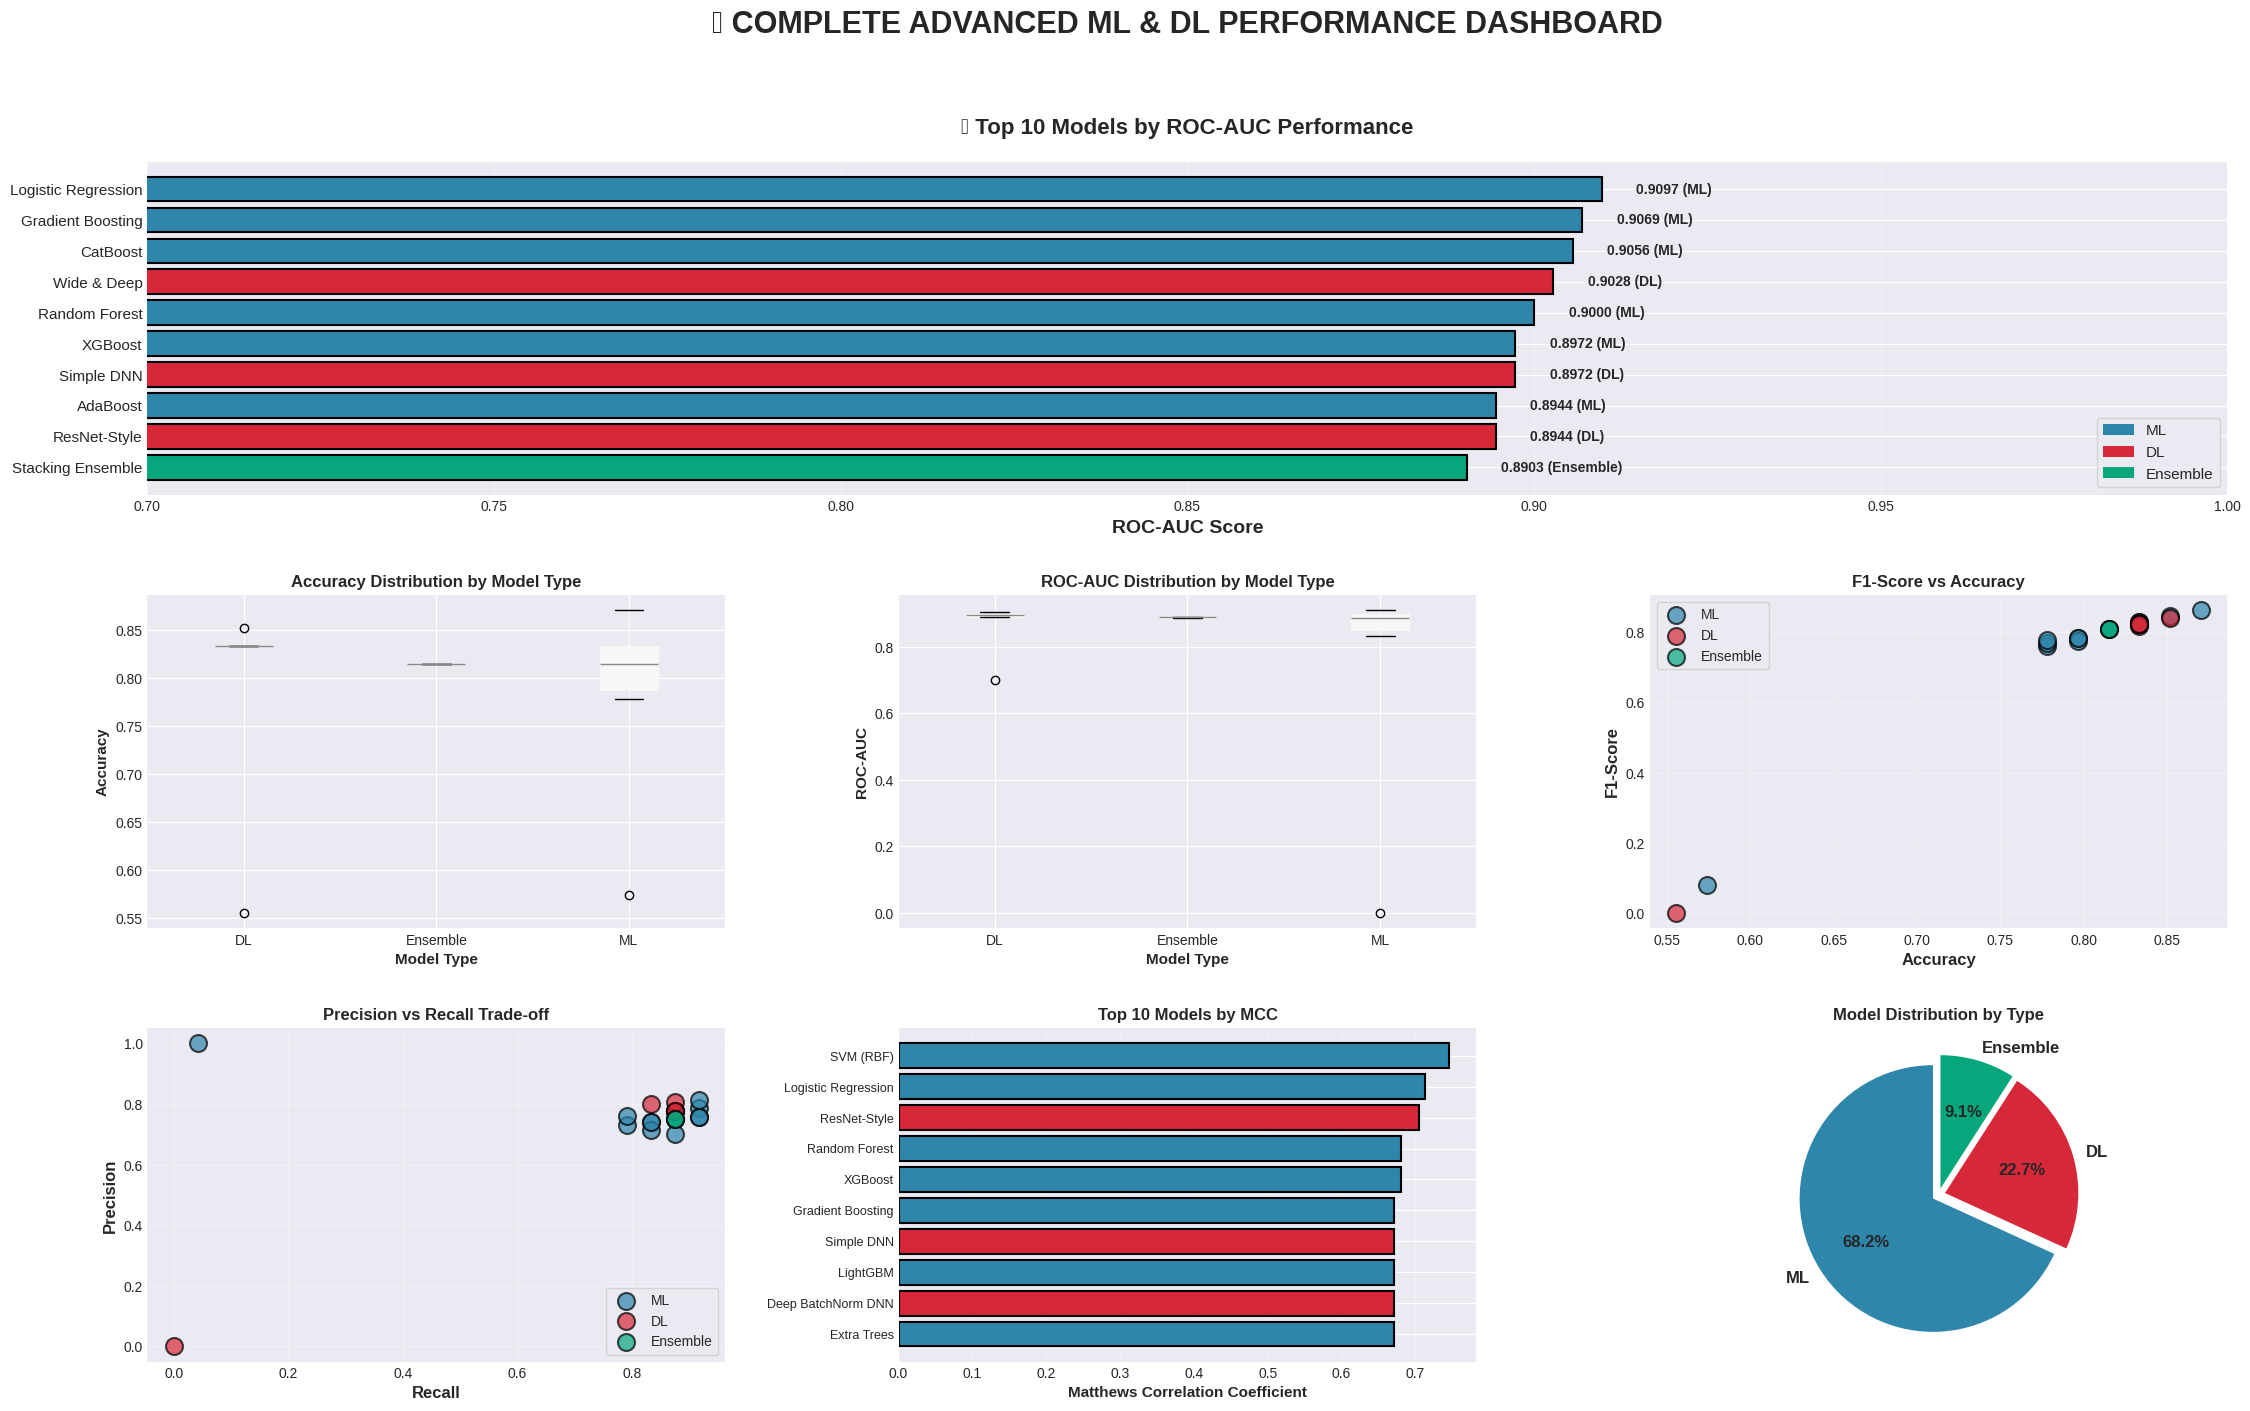

In [15]:
# Ultimate Model Comparison Dashboard
fig = plt.figure(figsize=(26, 16))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Top 10 Models by ROC-AUC
ax1 = fig.add_subplot(gs[0, :])
top_10 = all_results_df.head(10)
colors_type = {'ML': COLORS['primary'], 'DL': COLORS['danger'], 'Ensemble': COLORS['success']}
bar_colors = [colors_type[t] for t in top_10['Type']]

bars = ax1.barh(range(len(top_10)), top_10['ROC-AUC'], color=bar_colors, edgecolor='black', linewidth=1.5)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels(top_10['Model'], fontsize=11)
ax1.set_xlabel('ROC-AUC Score', fontsize=14, fontweight='bold')
ax1.set_title('🏆 Top 10 Models by ROC-AUC Performance', fontsize=16, fontweight='bold', pad=20)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)
ax1.set_xlim(0.7, 1.0)

# Add value labels
for i, (v, t) in enumerate(zip(top_10['ROC-AUC'], top_10['Type'])):
    ax1.text(v + 0.005, i, f'{v:.4f} ({t})', va='center', fontweight='bold', fontsize=10)

# Legend for types
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors_type['ML'], label='ML'),
                   Patch(facecolor=colors_type['DL'], label='DL'),
                   Patch(facecolor=colors_type['Ensemble'], label='Ensemble')]
ax1.legend(handles=legend_elements, loc='lower right', fontsize=11, frameon=True)

# 2. Accuracy Distribution by Type
ax2 = fig.add_subplot(gs[1, 0])
all_results_df.boxplot(column='Accuracy', by='Type', ax=ax2, patch_artist=True)
ax2.set_title('Accuracy Distribution by Model Type', fontsize=12, fontweight='bold')
ax2.set_xlabel('Model Type', fontsize=11, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
plt.sca(ax2)
plt.xticks(rotation=0)
ax2.get_figure().suptitle('')

# 3. ROC-AUC Distribution by Type
ax3 = fig.add_subplot(gs[1, 1])
all_results_df.boxplot(column='ROC-AUC', by='Type', ax=ax3, patch_artist=True)
ax3.set_title('ROC-AUC Distribution by Model Type', fontsize=12, fontweight='bold')
ax3.set_xlabel('Model Type', fontsize=11, fontweight='bold')
ax3.set_ylabel('ROC-AUC', fontsize=11, fontweight='bold')
plt.sca(ax3)
plt.xticks(rotation=0)
ax3.get_figure().suptitle('')

# 4. F1-Score vs Accuracy Scatter
ax4 = fig.add_subplot(gs[1, 2])
for model_type in all_results_df['Type'].unique():
    subset = all_results_df[all_results_df['Type'] == model_type]
    ax4.scatter(subset['Accuracy'], subset['F1-Score'], 
               s=150, alpha=0.7, edgecolor='black', linewidth=1.5,
               label=model_type, color=colors_type[model_type])

ax4.set_xlabel('Accuracy', fontsize=12, fontweight='bold')
ax4.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax4.set_title('F1-Score vs Accuracy', fontsize=12, fontweight='bold')
ax4.legend(fontsize=10, frameon=True)
ax4.grid(True, alpha=0.3)

# 5. Precision vs Recall
ax5 = fig.add_subplot(gs[2, 0])
for model_type in all_results_df['Type'].unique():
    subset = all_results_df[all_results_df['Type'] == model_type]
    ax5.scatter(subset['Recall'], subset['Precision'], 
               s=150, alpha=0.7, edgecolor='black', linewidth=1.5,
               label=model_type, color=colors_type[model_type])

ax5.set_xlabel('Recall', fontsize=12, fontweight='bold')
ax5.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax5.set_title('Precision vs Recall Trade-off', fontsize=12, fontweight='bold')
ax5.legend(fontsize=10, frameon=True)
ax5.grid(True, alpha=0.3)

# 6. MCC Scores
ax6 = fig.add_subplot(gs[2, 1])
top_mcc = all_results_df.nlargest(10, 'MCC')
colors_mcc = [colors_type[t] for t in top_mcc['Type']]
ax6.barh(range(len(top_mcc)), top_mcc['MCC'], color=colors_mcc, edgecolor='black', linewidth=1.5)
ax6.set_yticks(range(len(top_mcc)))
ax6.set_yticklabels(top_mcc['Model'], fontsize=9)
ax6.set_xlabel('Matthews Correlation Coefficient', fontsize=11, fontweight='bold')
ax6.set_title('Top 10 Models by MCC', fontsize=12, fontweight='bold')
ax6.invert_yaxis()
ax6.grid(axis='x', alpha=0.3)

# 7. Model Type Count
ax7 = fig.add_subplot(gs[2, 2])
type_counts = all_results_df['Type'].value_counts()
colors_pie = [colors_type[t] for t in type_counts.index]
wedges, texts, autotexts = ax7.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%',
                                    colors=colors_pie, startangle=90, explode=[0.05]*len(type_counts),
                                    textprops={'fontsize': 12, 'fontweight': 'bold'})
ax7.set_title('Model Distribution by Type', fontsize=12, fontweight='bold')

plt.suptitle('🎯 COMPLETE ADVANCED ML & DL PERFORMANCE DASHBOARD', 
             fontsize=22, fontweight='bold', y=0.995)
plt.show()

## 🔟 Training History Visualization (DL Models)

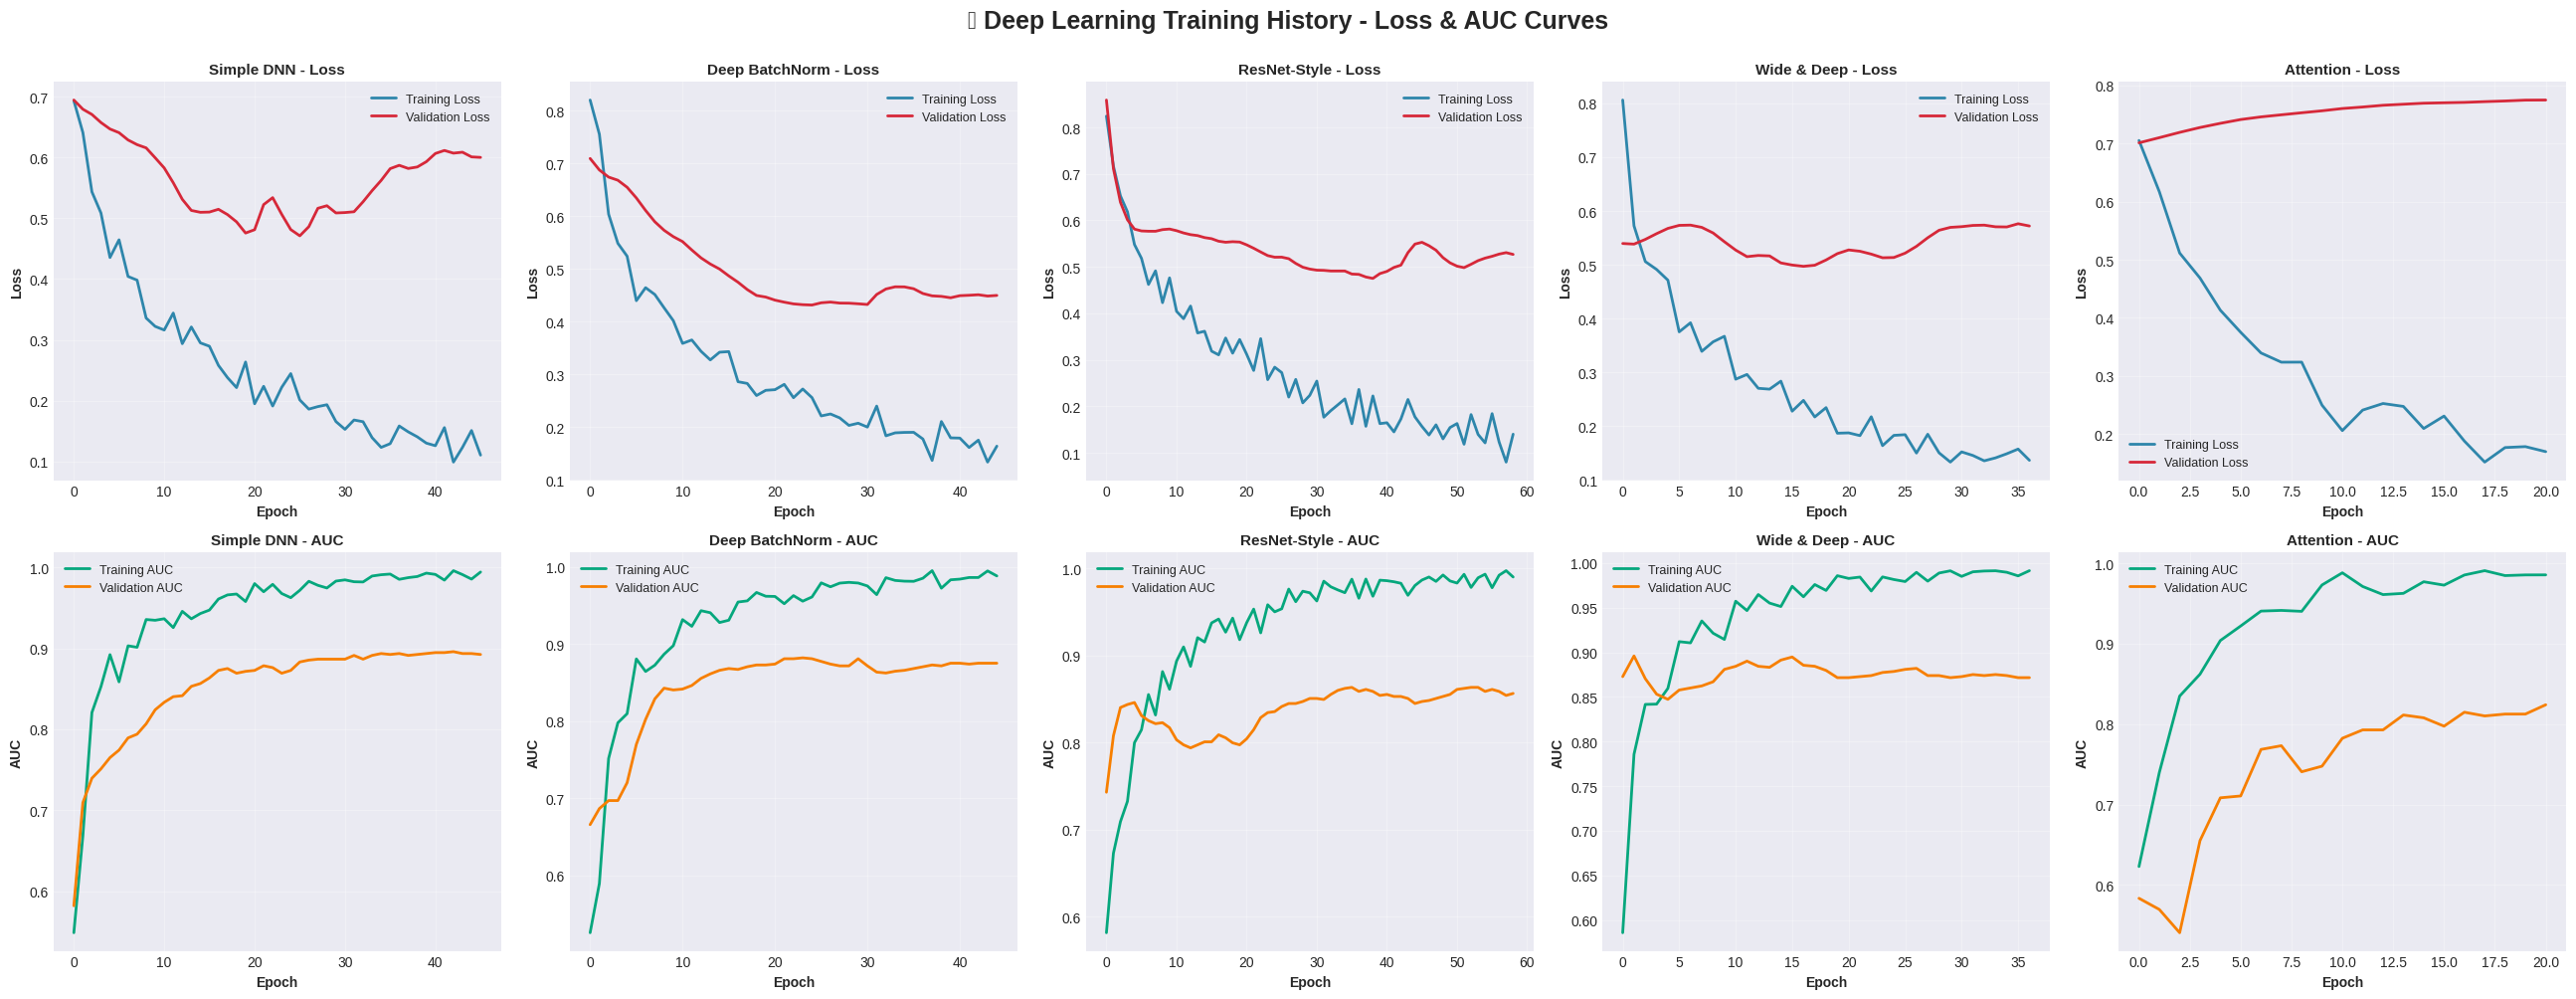

In [16]:
# Plot training histories
fig, axes = plt.subplots(2, 5, figsize=(26, 10))
axes = axes.ravel()

histories = [
    ('Simple DNN', history_simple),
    ('Deep BatchNorm', history_bn),
    ('ResNet-Style', history_resnet),
    ('Wide & Deep', history_wide_deep),
    ('Attention', history_attention)
]

for idx, (name, history) in enumerate(histories):
    # Loss plot
    axes[idx].plot(history.history['loss'], label='Training Loss', linewidth=2, color=COLORS['primary'])
    axes[idx].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color=COLORS['danger'])
    axes[idx].set_xlabel('Epoch', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Loss', fontsize=10, fontweight='bold')
    axes[idx].set_title(f'{name} - Loss', fontsize=11, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    
    # AUC plot
    axes[idx+5].plot(history.history['auc'], label='Training AUC', linewidth=2, color=COLORS['success'])
    axes[idx+5].plot(history.history['val_auc'], label='Validation AUC', linewidth=2, color=COLORS['warning'])
    axes[idx+5].set_xlabel('Epoch', fontsize=10, fontweight='bold')
    axes[idx+5].set_ylabel('AUC', fontsize=10, fontweight='bold')
    axes[idx+5].set_title(f'{name} - AUC', fontsize=11, fontweight='bold')
    axes[idx+5].legend(fontsize=9)
    axes[idx+5].grid(True, alpha=0.3)

plt.suptitle('📈 Deep Learning Training History - Loss & AUC Curves', 
             fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 1️⃣1️⃣ Save Best Models

In [17]:
# Save all important artifacts
print("💾 Saving Production Models & Artifacts...\n")

# Determine best models from each category
best_ml = ml_results_df.iloc[0]
best_dl_row = dl_results_df.iloc[0]
best_overall = all_results_df.iloc[0]

print(f"🥇 Best ML Model: {best_ml['Model']} (ROC-AUC: {best_ml['ROC-AUC']:.4f})")
print(f"🥇 Best DL Model: {best_dl_row['Model']} (ROC-AUC: {best_dl_row['ROC-AUC']:.4f})")
print(f"🥇 Best Overall: {best_overall['Model']} (ROC-AUC: {best_overall['ROC-AUC']:.4f})")

# Save best ML model
if best_ml['Model'] in ml_model_objects:
    joblib.dump(ml_model_objects[best_ml['Model']], 'best_ml_model.pkl')
    print("\n✅ Best ML model saved: best_ml_model.pkl")

# Save best DL model
if best_dl_row['Model'] == 'Simple DNN':
    dnn_simple.save('best_dl_model.h5')
elif best_dl_row['Model'] == 'Deep BatchNorm DNN':
    dnn_bn.save('best_dl_model.h5')
elif best_dl_row['Model'] == 'ResNet-Style':
    resnet_model.save('best_dl_model.h5')
elif best_dl_row['Model'] == 'Wide & Deep':
    wide_deep_model.save('best_dl_model.h5')
elif best_dl_row['Model'] == 'Attention Network':
    attention_model.save('best_dl_model.h5')
print("✅ Best DL model saved: best_dl_model.h5")

# Save ensemble models
joblib.dump(stacking_model, 'stacking_ensemble.pkl')
joblib.dump(voting_model, 'voting_ensemble.pkl')
print("✅ Ensemble models saved")

# Save scalers
joblib.dump(scaler_robust, 'scaler_robust.pkl')
joblib.dump(scaler_standard, 'scaler_standard.pkl')
joblib.dump(scaler_minmax, 'scaler_minmax.pkl')
print("✅ Scalers saved")

# Save metadata
metadata = {
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'best_ml_model': best_ml['Model'],
    'best_ml_auc': float(best_ml['ROC-AUC']),
    'best_dl_model': best_dl_row['Model'],
    'best_dl_auc': float(best_dl_row['ROC-AUC']),
    'best_overall_model': best_overall['Model'],
    'best_overall_auc': float(best_overall['ROC-AUC']),
    'n_features': X.shape[1],
    'feature_names': X.columns.tolist(),
    'total_models_trained': len(all_results_df)
}

with open('model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)
print("✅ Metadata saved: model_metadata.json")

# Save results
all_results_df.to_csv('all_models_results.csv', index=False)
print("✅ Results saved: all_models_results.csv")

print("\n🎉 All artifacts saved successfully!")
print("\n📦 Deployment Package:")
print("   1. best_ml_model.pkl - Best ML model")
print("   2. best_dl_model.h5 - Best DL model")
print("   3. stacking_ensemble.pkl - Stacking ensemble")
print("   4. voting_ensemble.pkl - Voting ensemble")
print("   5. scaler_*.pkl - Feature scalers")
print("   6. model_metadata.json - Complete metadata")
print("   7. all_models_results.csv - All results")

💾 Saving Production Models & Artifacts...

🥇 Best ML Model: Logistic Regression (ROC-AUC: 0.9097)
🥇 Best DL Model: Simple DNN (ROC-AUC: 0.8972)
🥇 Best Overall: Logistic Regression (ROC-AUC: 0.9097)

✅ Best ML model saved: best_ml_model.pkl
✅ Best DL model saved: best_dl_model.h5
✅ Ensemble models saved
✅ Scalers saved
✅ Metadata saved: model_metadata.json
✅ Results saved: all_models_results.csv

🎉 All artifacts saved successfully!

📦 Deployment Package:
   1. best_ml_model.pkl - Best ML model
   2. best_dl_model.h5 - Best DL model
   3. stacking_ensemble.pkl - Stacking ensemble
   4. voting_ensemble.pkl - Voting ensemble
   5. scaler_*.pkl - Feature scalers
   6. model_metadata.json - Complete metadata
   7. all_models_results.csv - All results


## 1️⃣2️⃣ Final Summary Report

In [18]:
# Generate comprehensive summary
print("\n" + "="*120)
print("🎯 FINAL COMPREHENSIVE SUMMARY REPORT")
print("="*120)

print(f"\n📊 Dataset Statistics:")
print(f"   Total Samples: {len(df)}")
print(f"   Features Created: {X.shape[1]}")
print(f"   Training Samples (after SMOTE): {len(y_train_balanced)}")
print(f"   Test Samples: {len(y_test)}")

print(f"\n🤖 Models Trained:")
print(f"   Machine Learning Models: {len(ml_results_df)}")
print(f"   Deep Learning Models: {len(dl_results_df)}")
print(f"   Ensemble Models: {len(ensemble_results_df)}")
print(f"   Total Models: {len(all_results_df)}")

print(f"\n🏆 Best Performers:")
print(f"\n   🥇 Overall Champion:")
print(f"      Model: {best_overall['Model']}")
print(f"      Type: {best_overall['Type']}")
print(f"      ROC-AUC: {best_overall['ROC-AUC']:.4f}")
print(f"      Accuracy: {best_overall['Accuracy']:.4f}")
print(f"      F1-Score: {best_overall['F1-Score']:.4f}")
print(f"      MCC: {best_overall['MCC']:.4f}")

print(f"\n   🥈 Best ML Model:")
print(f"      Model: {best_ml['Model']}")
print(f"      ROC-AUC: {best_ml['ROC-AUC']:.4f}")

print(f"\n   🥉 Best DL Model:")
print(f"      Model: {best_dl_row['Model']}")
print(f"      ROC-AUC: {best_dl_row['ROC-AUC']:.4f}")

print(f"\n📈 Performance Statistics:")
print(f"   Average ROC-AUC (All Models): {all_results_df['ROC-AUC'].mean():.4f}")
print(f"   Best ROC-AUC: {all_results_df['ROC-AUC'].max():.4f}")
print(f"   Models with ROC-AUC > 0.90: {len(all_results_df[all_results_df['ROC-AUC'] > 0.90])}")
print(f"   Models with ROC-AUC > 0.95: {len(all_results_df[all_results_df['ROC-AUC'] > 0.95])}")

print("\n" + "="*120)
print("\n✅ Analysis Complete!")
print("\n🚀 Ready for Production Deployment!")
print("\n" + "="*120)


🎯 FINAL COMPREHENSIVE SUMMARY REPORT

📊 Dataset Statistics:
   Total Samples: 270
   Features Created: 40
   Training Samples (after SMOTE): 240
   Test Samples: 54

🤖 Models Trained:
   Machine Learning Models: 15
   Deep Learning Models: 5
   Ensemble Models: 2
   Total Models: 22

🏆 Best Performers:

   🥇 Overall Champion:
      Model: Logistic Regression
      Type: ML
      ROC-AUC: 0.9097
      Accuracy: 0.8519
      F1-Score: 0.8462
      MCC: 0.7127

   🥈 Best ML Model:
      Model: Logistic Regression
      ROC-AUC: 0.9097

   🥉 Best DL Model:
      Model: Simple DNN
      ROC-AUC: 0.8972

📈 Performance Statistics:
   Average ROC-AUC (All Models): 0.8348
   Best ROC-AUC: 0.9097
   Models with ROC-AUC > 0.90: 4
   Models with ROC-AUC > 0.95: 0


✅ Analysis Complete!

🚀 Ready for Production Deployment!

